In [3]:
# Importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df_original =pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data CLeanup
df_original['job_posted_date']=pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills']=df_original['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Filtering Data for United States

In [4]:
df_US=df_original[df_original['job_country']=='United States']

In [10]:
df_skills=df_US.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


Counting Skills per Job Title

In [17]:
df_skill_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skill_count=df_skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


Top 3 Roles

In [22]:
job_titles=df_skill_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

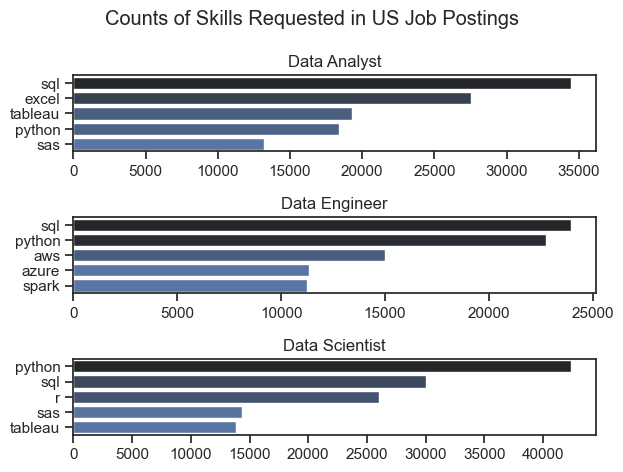

In [40]:
fig, ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

# Plot
for i, job_title in enumerate(job_titles):
    df_plot=df_skill_count[df_skill_count['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,
                x='skill_count',
                y='job_skills',
                hue='skill_count',
                palette='dark:b_r',
                ax=ax[i])
    ax[i].set(ylabel='',xlabel='',title=job_title)
    ax[i].get_legend().remove()

fig.suptitle('Counts of Skills Requested in US Job Postings')
plt.tight_layout()